In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

In [2]:
glowpick_CB = "glowpick\glowpick_comment_by_brand_202204031838.csv"
glowpick_CL = "glowpick\glowpick_comment_list_202204031838.csv"

font_manager.get_fontconfig_fonts()
font_path = 'C:\Windows\Fonts\gulim.ttc'
font = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font',family=font)

gcb = pd.read_csv(glowpick_CB)
gcl = pd.read_csv(glowpick_CL)
gcb['brand_name'].value_counts().index

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  after removing the cwd from sys.path.


Index(['에뛰드', '키스미', '이니스프리', '나스', '클리오', '미샤', '페리페라', '로라메르시에', '바비브라운',
       '맥',
       ...
       '프로랑스', '정샘물', '프레쉬', '아르데코', '비디보브', '입큰', '헤이미쉬', '버버리', '포니이펙트',
       '칼리'],
      dtype='object', length=109)

In [3]:
def Week_brand_name(keyword):
    if len(gcl) > len(gcb):
        gcl_ = gcl[['rating','create_date']][:len(gcb)]
        gcb_ = gcb
    elif len(gcl) == len(gcb):
        pass
    elif len(gcl) < len(gcb):
        gcl_ = gcl
        gcb_ = gcb[:len(gcl)]    
    
    gpdata_ = pd.concat([gcb,gcl_], axis = 1)
    gpdata = gpdata_.sort_values(by=['create_date'], axis=0,ascending=True).drop(['review_text'], axis = 'columns')

    gpdata_1 = gpdata[gpdata['brand_name']== keyword ]

    gpdata_1['date'] = pd.to_datetime(gpdata_1['create_date']).dt.normalize()
    gpdata_2 = gpdata_1.drop(['create_date'], axis = 'columns')
    gpdata_2['datetime'] = gpdata_2['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
    gpdata_2.set_index(gpdata_2['datetime'], inplace=True)
    gpdata_2 = gpdata_2.drop('datetime', 1).drop('date', 1)
    gpdata_2['count'] = 1

    positive = gpdata_2[gpdata_2['rating'] >= 4]
    neutral =  gpdata_2[gpdata_2['rating'] == 3]
    negative = gpdata_2[gpdata_2['rating'] <= 2]

    recent_week_positive = positive.resample('D').sum().drop(['rating'], axis = 'columns')
    recent_week_positive = recent_week_positive.rename(columns={'count':'positive_count'})

    recent_week_neutral = neutral.resample('D').sum().drop(['rating'], axis = 'columns')
    recent_week_neutral = recent_week_neutral.rename(columns={'count':'neutral_count'})

    recent_week_negative = negative.resample('D').sum().drop(['rating'], axis = 'columns')
    recent_week_negative = recent_week_negative.rename(columns={'count':'negative_count'})

    recent_week = pd.concat([recent_week_positive, recent_week_neutral, recent_week_negative], axis = 1).fillna(0)
    recent_week['total'] = recent_week['positive_count'] + recent_week['neutral_count'] + recent_week['negative_count'].fillna(0)
    recent_week['recent_week_positive_percent'] = round(recent_week['positive_count'] / recent_week['total'] * 100, 1).fillna(0)
    recent_week['recent_week_neutral_percent'] = round(recent_week['neutral_count'] / recent_week['total'] * 100, 1).fillna(0)
    recent_week['recent_week_negative_percent'] = round(recent_week['negative_count'] / recent_week['total'] * 100, 1).fillna(0)
    recent_week_4 = recent_week[-8:-1]
    recent_week_4 = recent_week_4.reset_index()

    recent_week_4['datetime']= recent_week_4['datetime'].astype('str')
    
    recent_week_4['few_days'] = pd.DataFrame({'few_days' : ['1일차', '2일차', '3일차', '4일차', '5일차', '6일차', '7일차']})

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)

    ax.set_axisbelow(True)
    ax.grid(True, axis='y')

    ax.bar(recent_week_4['few_days'], recent_week_4['positive_count'],
           bottom = recent_week_4['negative_count'] + recent_week_4['neutral_count'], label = '긍정', color = '#0599e8')
    ax.bar(recent_week_4['few_days'], recent_week_4['neutral_count'],
           bottom = recent_week_4['negative_count'], label = '중립', color = '#fc4e03')
    ax.bar(recent_week_4['few_days'], recent_week_4['negative_count'],
           label = '부정', color = 'green')

    ax.set_xlabel('기간', fontsize = 25)
    ax.set_ylabel('언급 수', fontsize = 25)
    ax.set_title(keyword+' 최근 일주일', fontsize = 25)
    ax.tick_params(axis = 'x', labelsize = 20)
    ax.tick_params(axis = 'y', labelsize = 20)

    ax.legend(fontsize = 25)

    for i in range(len(recent_week_4['datetime'])):

        if recent_week_4['recent_week_positive_percent'][i] == 0:
            pass

        else:
            ax.text(recent_week_4['few_days'][i], recent_week_4['negative_count'][i] + recent_week_4['neutral_count'][i] + recent_week_4['positive_count'][i] / 2,
                    str(recent_week_4['recent_week_positive_percent'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')

        if recent_week_4['recent_week_neutral_percent'][i] == 0: 
            pass

        else:
            ax.text(recent_week_4['few_days'][i],
                    recent_week_4['negative_count'][i] + recent_week_4['neutral_count'][i]/2,
                    str(recent_week_4['recent_week_neutral_percent'][i]) + '%', fontsize = 15, horizontalalignment='center', color = 'w')

        if recent_week_4['recent_week_negative_percent'][i] == 0:
            pass

        else:
            ax.text(recent_week_4['few_days'][i],
                    recent_week_4['negative_count'][i] / 2,
                    str(recent_week_4['recent_week_negative_percent'][i]) + '%', fontsize = 15, horizontalalignment='center', color = 'w')
def Month_brand_name(keyword):
    if len(gcl) > len(gcb):
        gcl_ = gcl[['rating','create_date']][:len(gcb)]
        gcb_ = gcb
    elif len(gcl) == len(gcb):
        pass
    elif len(gcl) < len(gcb):
        gcl_ = gcl
        gcb_ = gcb[:len(gcl)]    
    
    gpdata_ = pd.concat([gcb,gcl_], axis = 1)
    gpdata = gpdata_.sort_values(by=['create_date'], axis=0,ascending=True).drop(['review_text'], axis = 'columns')

    gpdata_1 = gpdata[gpdata['brand_name']== keyword ]

    gpdata_1['date'] = pd.to_datetime(gpdata_1['create_date']).dt.normalize()
    gpdata_2 = gpdata_1.drop(['create_date'], axis = 'columns')
    gpdata_2['datetime'] = gpdata_2['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
    gpdata_2.set_index(gpdata_2['datetime'], inplace=True)
    gpdata_2 = gpdata_2.drop('datetime', 1).drop('date', 1)
    gpdata_2['count'] = 1

    positive = gpdata_2[gpdata_2['rating'] >= 4]
    neutral =  gpdata_2[gpdata_2['rating'] == 3]
    negative = gpdata_2[gpdata_2['rating'] <= 2]

    recent_month_positive = positive.resample('W').sum().drop(['rating'], axis = 'columns')
    recent_month_positive = recent_month_positive.rename(columns={'count':'positive_count'})

    recent_month_neutral = neutral.resample('W').sum().drop(['rating'], axis = 'columns')
    recent_month_neutral = recent_month_neutral.rename(columns={'count':'neutral_count'})

    recent_month_negative = negative.resample('W').sum().drop(['rating'], axis = 'columns')
    recent_month_negative = recent_month_negative.rename(columns={'count':'negative_count'})

    recent_month = pd.concat([recent_month_positive, recent_month_neutral, recent_month_negative], axis = 1).fillna(0)
    recent_month['total'] = recent_month['positive_count'] + recent_month['neutral_count'] + recent_month['negative_count'].fillna(0)
    recent_month['recent_month_positive_percent'] = round(recent_month['positive_count'] / recent_month['total'] * 100, 1).fillna(0)
    recent_month['recent_month_neutral_percent'] = round(recent_month['neutral_count'] / recent_month['total'] * 100, 1).fillna(0)
    recent_month['recent_month_negative_percent'] = round(recent_month['negative_count'] / recent_month['total'] * 100, 1).fillna(0)
    recent_month_4 = recent_month[-5:-1]
    recent_month_4 = recent_month_4.reset_index()

    recent_month_4['datetime']= recent_month_4['datetime'].astype('str')
    
    recent_month_4['few_weeks'] = pd.DataFrame({'few_weeks' : ['1주차', '2주차', '3주차', '4주차']})

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)

    ax.set_axisbelow(True)
    ax.grid(True, axis='y')

    ax.bar(recent_month_4['few_weeks'], recent_month_4['positive_count'],
           bottom = recent_month_4['negative_count'] + recent_month_4['neutral_count'], label = '긍정', color = '#0599e8')
    ax.bar(recent_month_4['few_weeks'], recent_month_4['neutral_count'],
           bottom = recent_month_4['negative_count'], label = '중립', color = '#fc4e03')
    ax.bar(recent_month_4['few_weeks'], recent_month_4['negative_count'],
           label = '부정', color = 'green')

    ax.set_xlabel('기간', fontsize = 25)
    ax.set_ylabel('언급 수', fontsize = 25)
    ax.set_title(keyword+' 최근 한달', fontsize = 25)
    ax.tick_params(axis = 'x', labelsize = 20)
    ax.tick_params(axis = 'y', labelsize = 20)

    ax.legend(fontsize = 25)

    for i in range(len(recent_month_4['datetime'])):

        if recent_month_4['recent_month_positive_percent'][i] == 0:
            pass

        else:
            ax.text(recent_month_4['few_weeks'][i], recent_month_4['negative_count'][i] + recent_month_4['neutral_count'][i] + recent_month_4['positive_count'][i] / 2,
                    str(recent_month_4['recent_month_positive_percent'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')

        if recent_month_4['recent_month_neutral_percent'][i] == 0: 
            pass

        else:
            ax.text(recent_month_4['few_weeks'][i],
                    recent_month_4['negative_count'][i] + recent_month_4['neutral_count'][i]/2,
                    str(recent_month_4['recent_month_neutral_percent'][i]) + '%', fontsize = 15, horizontalalignment='center', color = 'w')

        if recent_month_4['recent_month_negative_percent'][i] == 0:
            pass

        else:
            ax.text(recent_month_4['few_weeks'][i],
                    recent_month_4['negative_count'][i] / 2,
                    str(recent_month_4['recent_month_negative_percent'][i]) + '%', fontsize = 15, horizontalalignment='center', color = 'w')

기간을 입력하세요(최근 일주일, 최근 한달) : 최근 한달
브랜드를 입력하세요 : 이니스프리


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


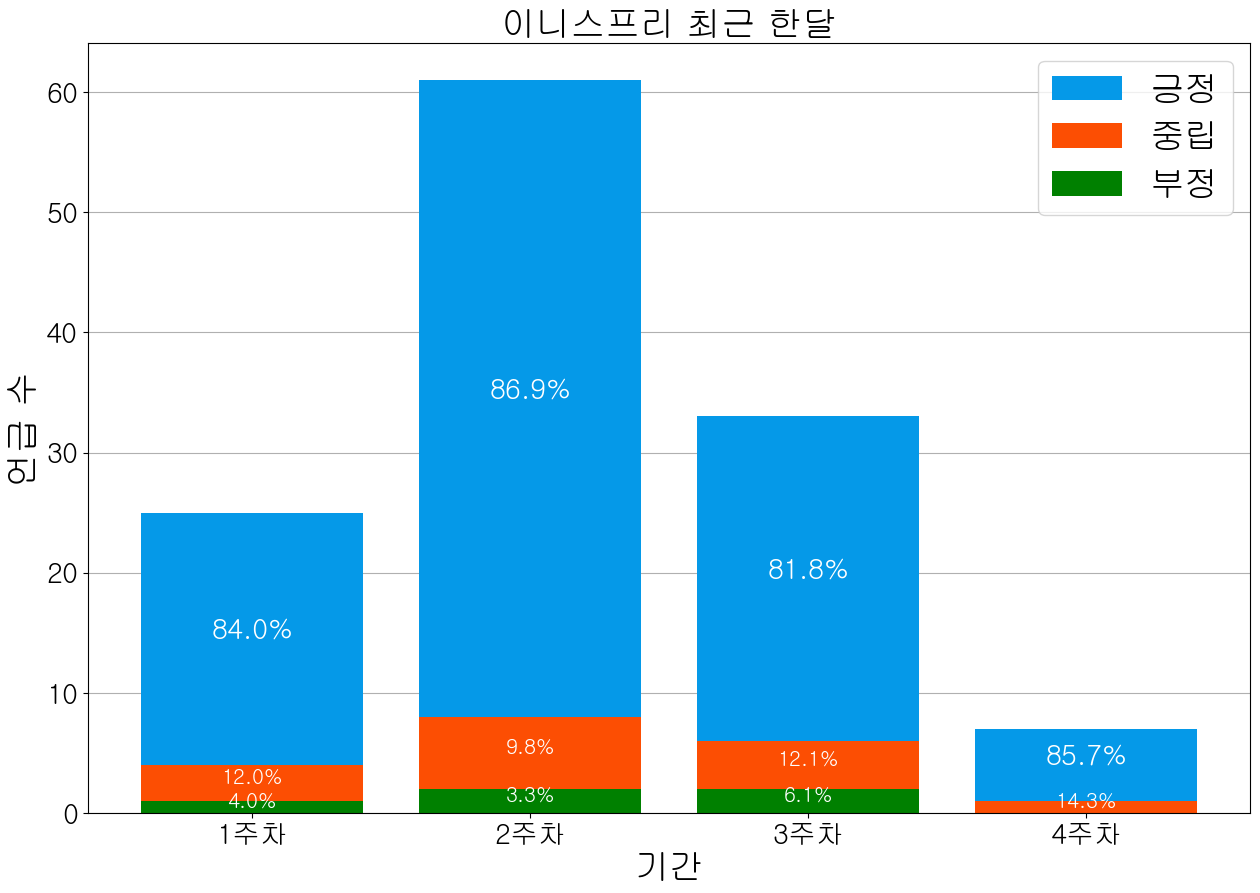

In [4]:
Period = input('기간을 입력하세요(최근 일주일, 최근 한달) : ')
keyword = input('브랜드를 입력하세요 : ')
if Period == '최근 일주일':
    Week_brand_name(keyword)
else:
    Month_brand_name(keyword)